Nova IMS - Post-graduation Data Science for Finance
Algorithmic Trading Group Assignment
Group members:
- 
-
- 
- 
- 

In [1]:
#imports
import pandas as pd
import yfinance as yf
!pip install pandas_ta
import pandas_ta as ta
import plotly.graph_objects as go
from datetime import datetime, date
import backtrader as bt

In [2]:
# download assets data
tesla = yf.download('TSLA', start='2014-01-01', end='2022-12-31') #Tesla
spy = yf.download('SPY', start='2014-01-01', end='2022-12-31', interval='1d') #S&P500 ETF

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
#See Tesla data
tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02 00:00:00-05:00,9.986667,10.165333,9.770000,10.006667,10.006667,92826000
2014-01-03 00:00:00-05:00,10.000000,10.146000,9.906667,9.970667,9.970667,70425000
2014-01-06 00:00:00-05:00,10.000000,10.026667,9.682667,9.800000,9.800000,80416500
2014-01-07 00:00:00-05:00,9.841333,10.026667,9.683333,9.957333,9.957333,75511500
2014-01-08 00:00:00-05:00,9.923333,10.246667,9.917333,10.085333,10.085333,92448000
...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27 00:00:00-05:00,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28 00:00:00-05:00,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


<AxesSubplot: xlabel='Date'>

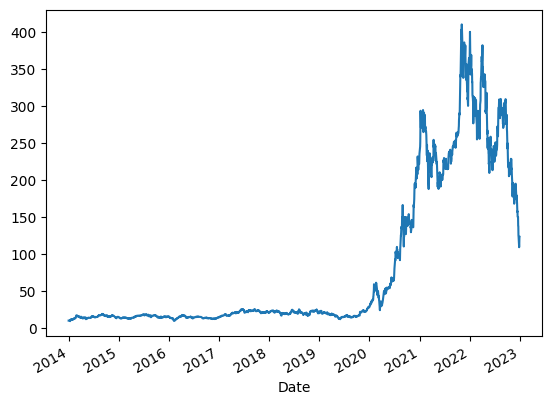

In [4]:
#Plot Tesla close price 
tesla.Close.plot()

In [5]:
#See S&P500 ETF data
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02 00:00:00-05:00,183.979996,184.070007,182.479996,182.919998,154.400238,119636900
2014-01-03 00:00:00-05:00,183.229996,183.600006,182.630005,182.889999,154.374863,81390600
2014-01-06 00:00:00-05:00,183.490005,183.559998,182.080002,182.360001,153.927582,108028200
2014-01-07 00:00:00-05:00,183.089996,183.789993,182.949997,183.479996,154.872925,86144200
2014-01-08 00:00:00-05:00,183.449997,183.830002,182.889999,183.520004,154.906693,96582300
...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,379.649994,383.059998,378.029999,382.910004,381.454193,59857300
2022-12-27 00:00:00-05:00,382.790009,383.149994,379.649994,381.399994,379.949921,51638200
2022-12-28 00:00:00-05:00,381.329987,383.390015,376.420013,376.660004,375.227936,70911500


<AxesSubplot: xlabel='Date'>

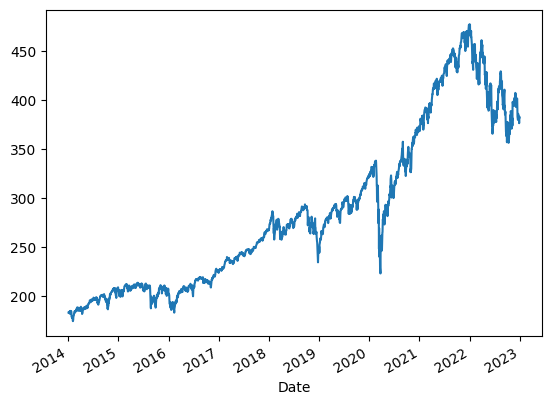

In [6]:
#Plot S&P500 ETF close price 
spy.Close.plot()

### Strategy A

Use Bollinger bands

When high is above the upper line and the close is below the upper line short sell

When low is below the lower line and the close is above the lower line go long

In [7]:
#calculate bollinger bands for S&P500 ETF and append to data set
tesla.ta.bbands(length=14, std=2, mamode="ema", append=True)
tesla.tail(10)

,Open,High,Low,Close,Adj Close,Volume,BBL_14_2.0,BBM_14_2.0,BBU_14_2.0,BBB_14_2.0,BBP_14_2.0
Date,,,,,,,,,,,
2022-12-16 00:00:00-05:00,159.639999,160.990005,150.039993,150.229996,150.229996,139032200,141.823683,170.091079,198.358476,33.237953,0.148693
2022-12-19 00:00:00-05:00,154.000000,155.250000,145.820007,149.869995,149.869995,139390600,136.623677,167.394935,198.166192,36.764861,0.215238
2022-12-20 00:00:00-05:00,146.050003,148.470001,137.660004,137.800003,137.800003,159563300,130.475283,163.448944,196.422605,40.347352,0.111069
2022-12-21 00:00:00-05:00,139.339996,141.259995,135.889999,137.570007,137.570007,145417400,126.846853,159.998419,193.149986,41.439868,0.161729
2022-12-22 00:00:00-05:00,136.000000,136.630005,122.260002,125.349998,125.349998,210090300,121.126571,155.378630,189.630688,44.088506,0.061652
2022-12-23 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,114.637908,151.081479,187.525050,48.243598,0.116785
2022-12-27 00:00:00-05:00,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,104.712897,145.483948,186.255000,56.048865,0.053802
2022-12-28 00:00:00-05:00,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,98.396373,141.114089,183.831804,60.543517,0.167537
2022-12-29 00:00:00-05:00,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,97.103680,138.541543,179.979407,59.820127,0.298234


In [8]:
#calculate bollinger bands for S&P500 ETF and append to data set
spy.ta.bbands(length=14, std=2, mamode="ema", append=True)
spy.tail(10)

,Open,High,Low,Close,Adj Close,Volume,BBL_14_2.0,BBM_14_2.0,BBU_14_2.0,BBB_14_2.0,BBP_14_2.0
Date,,,,,,,,,,,
2022-12-16 00:00:00-05:00,385.179993,386.579987,381.040009,383.269989,381.812805,119858000,381.539652,395.072416,408.605179,6.850776,0.063931
2022-12-19 00:00:00-05:00,383.470001,383.820007,378.279999,380.019989,378.575165,79878100,376.780894,393.065425,409.349957,8.285914,0.099453
2022-12-20 00:00:00-05:00,379.230011,382.230011,377.850006,380.540009,379.093201,74427200,374.437700,391.395370,408.353040,8.665238,0.179928
2022-12-21 00:00:00-05:00,383.250000,387.410004,382.690002,386.230011,384.761566,78167400,374.845196,390.706655,406.568115,8.119370,0.358883
2022-12-22 00:00:00-05:00,383.049988,386.209991,374.769989,380.720001,379.272491,100120900,374.325820,389.375101,404.424383,7.729966,0.212441
2022-12-23 00:00:00-05:00,379.649994,383.059998,378.029999,382.910004,381.454193,59857300,373.669009,388.513088,403.357168,7.641482,0.311269
2022-12-27 00:00:00-05:00,382.790009,383.149994,379.649994,381.399994,379.949921,51638200,372.260754,387.564676,402.868597,7.897480,0.298591
2022-12-28 00:00:00-05:00,381.329987,383.390015,376.420013,376.660004,375.227936,70911500,369.728562,386.110719,402.492877,8.485731,0.211555
2022-12-29 00:00:00-05:00,379.630005,384.350006,379.079987,383.440002,381.982178,66970900,369.906417,385.754624,401.602831,8.216729,0.426975


<AxesSubplot: xlabel='Date'>

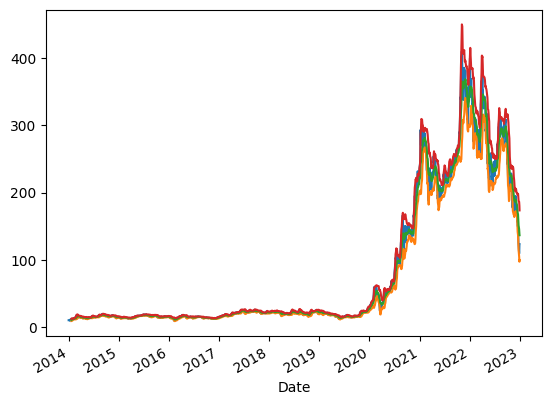

In [9]:
#Plot Bbands of Tesla
tesla.Close.plot()
tesla['BBL_14_2.0'].plot()
tesla['BBM_14_2.0'].plot()
tesla['BBU_14_2.0'].plot()

In [10]:
#Create a class to test our strategy
class RsiSma(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

        
    def __init__(self):
        #self.dataclose = self.datas[0].close
        self.sma = bt.ind.SMA(self.data, period=20)
        self.sma_close = bt.ind.SMA(self.data, period=40)
        self.rsi = bt.ind.RSI(self.data, period=14, safediv=True)
        
        
    def next(self):
         #implement the trading logic
        
        if not self.position:  # not in the market
            #Logic for long order
            if self.rsi < 30 and self.rsi[-1] >= 30 and self.data.close[0] > self.sma[0]:             
                self.buy()  # enter long
            #Logic for short order    
            elif self.rsi < 70 and self.rsi[-1] >= 70 and self.data.close[0] < self.sma[0]:
                self.sell()  # enter short
                         
        #close open orders
        else:
            if self.position.size > 0:  #The open position is a buy
                #close the position when close price crosses below the sma
                self.data.close[0] < self.sma_close[0]
                self.close()  #close long position
            elif self.position.size < 0:# The open position is a sell
                self.data.close[0] > self.sma_close[0]
                self.close()  #close short position
            

    def stop(self):
        self.close()
        print('==================================================')
        print(f'Starting Value: {self.broker.startingcash:,.2f}')
        print(f'Ending   Value: {self.broker.getvalue():,.2f}')
        print('==================================================')

        

Starting Portfolio Value: 10,000.00
Starting Value: 10,000.00
Ending   Value: 10,015.66
Final Portfolio Value: 10,015.66


<IPython.core.display.Javascript object>


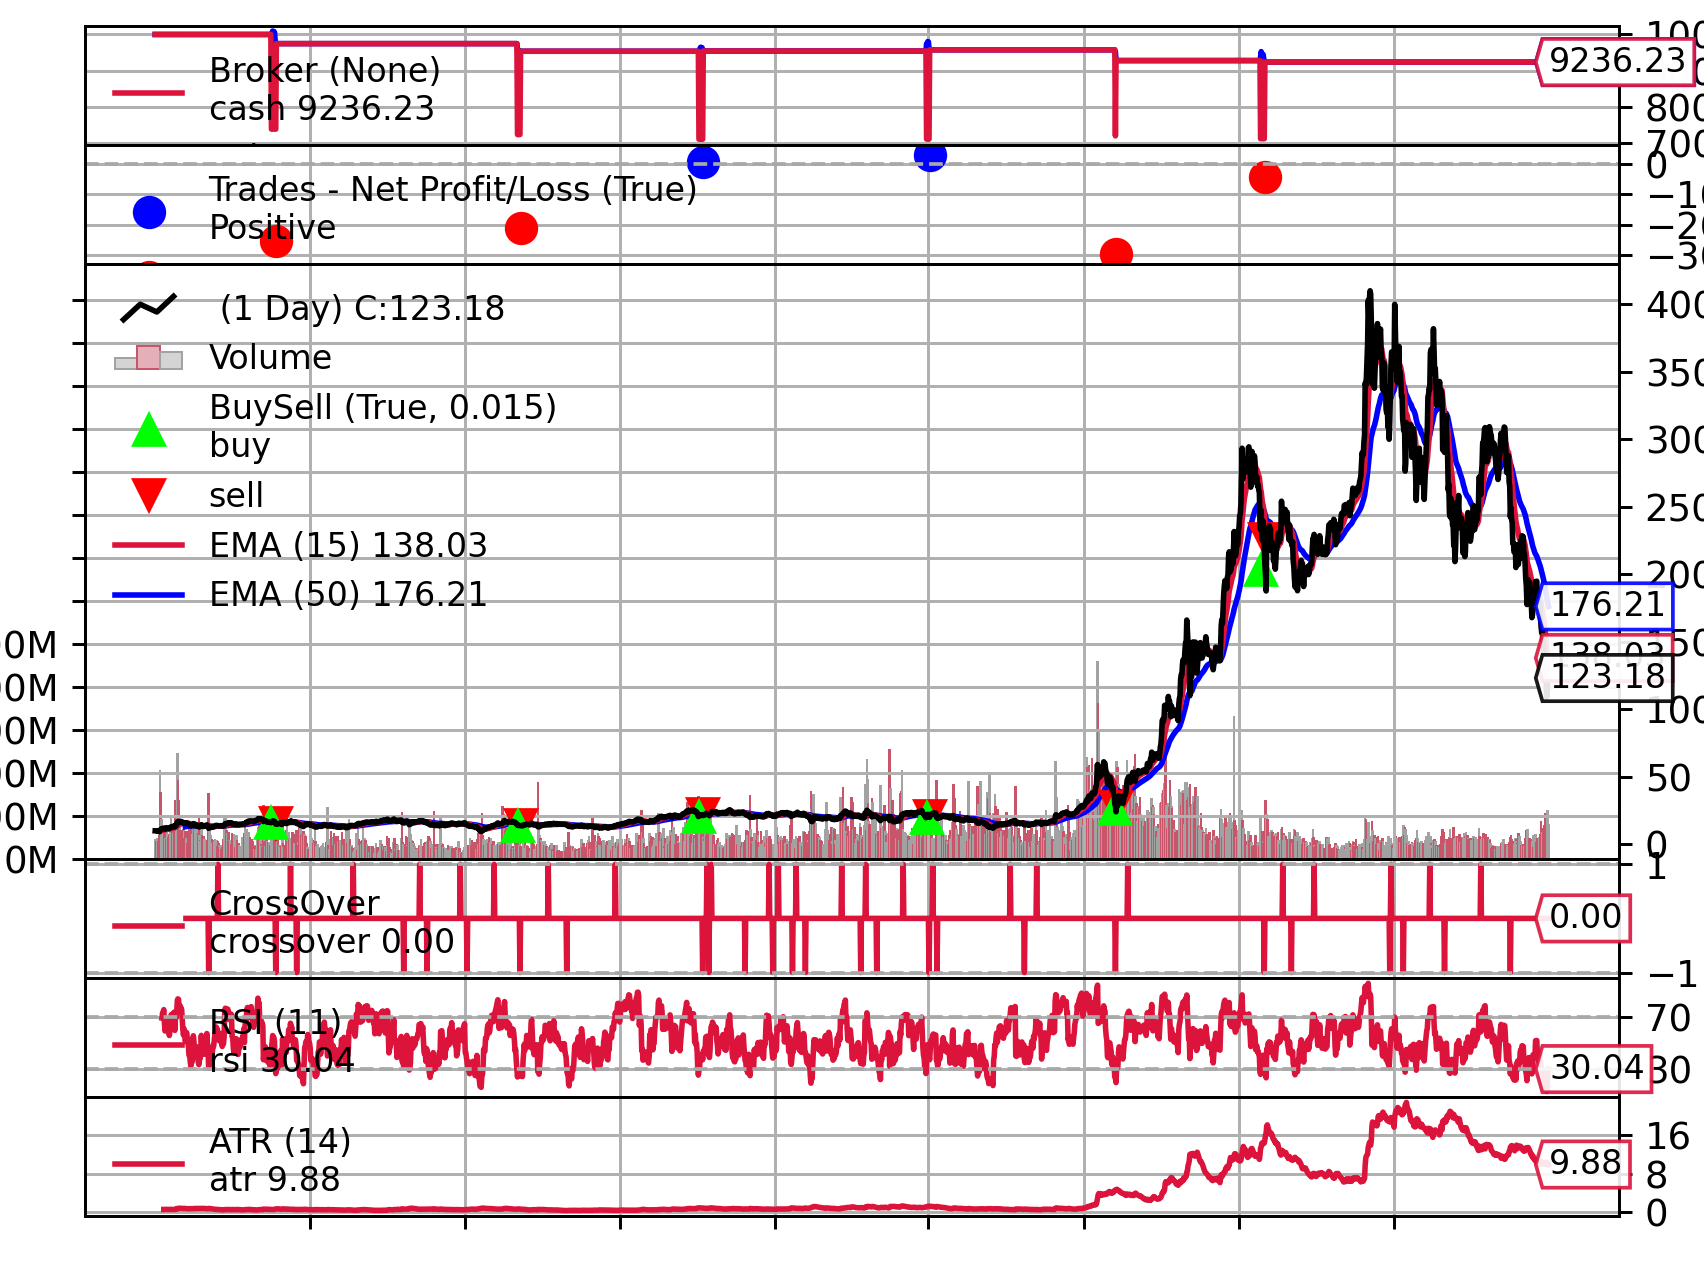

[[<Figure size 640x480 with 5 Axes>]]

In [11]:
cerebro = bt.Cerebro()
cerebro.broker.setcash(10000)
tesla_bt = bt.feeds.PandasData(dataname=tesla)
cerebro.adddata(tesla_bt)
cerebro.addsizer(bt.sizers.PercentSizer, percents=25)
cerebro.addstrategy(RsiSma)
cerebro.broker.setcommission(commission=0.005)
#cerebro.addanalyzer(bt.analyzers.SharpeRatio, annualize=True)
#cerebro.addanalyzer(bt.analyzers.Returns)

print(f'Starting Portfolio Value: {cerebro.broker.getvalue():,.2f}')
results = cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():,.2f}')

#print('Sharpe Ratio: ', results[0].analyzers.sharperatio.get_analysis()['sharperatio'])
#print('Returns: ', results[0].analyzers.returns.get_analysis().get('rtot'))
cerebro.plot(iplot=True)

In [12]:
#Create a class to test our strategy
class TradingStrategy(bt.Strategy):
    """
    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))"""

        
    def __init__(self):
        #indicator to use in strategy
        self.rsi = bt.indicators.RSI(self.data.close, period=11)
        self.ema_fast = bt.indicators.EMA(period=15)
        self.ema_slow = bt.indicators.EMA(period=50)
        self.crossover = bt.ind.CrossOver(self.ema_fast, self.ema_slow)  # crossover signal
        self.atr = bt.indicators.ATR(self.data, period=14)
        
        
        
    def next(self):
        #implement the trading logic
        if not self.position:  # not in the market
            #Logic for long order
            if self.rsi < 30 and self.ema_fast > self.ema_slow:
                self.buy()
            #Logic for short order    
            """elif self.rsi < 70 and self.rsi[-1] >= 70 and self.data.close[0] < self.sma[0]:
                self.sell()  # enter short"""
                  
        #close open orders
        else:
            if self.crossover < 0:  # in the market & cross to the downside
                    self.close()
            """elif self.position.size < 0:# The open position is a sell
                self.data.close[0] > self.sma_close[0]
                self.close()  #close short position"""
            

    def stop(self):
        self.close()
        print('==================================================')
        print(f'Starting Value: {self.broker.startingcash:,.2f}')
        print(f'Ending   Value: {self.broker.getvalue():,.2f}')
        print('==================================================')

        
        
cerebro = bt.Cerebro()
cerebro.broker.setcash(10000)
#rename columns name because of indicator
tesla_bt = bt.feeds.PandasData(dataname=tesla)
cerebro.adddata(tesla_bt)
cerebro.addsizer(bt.sizers.PercentSizer, percents=25)
cerebro.addstrategy(TradingStrategy)
cerebro.broker.setcommission(commission=0.005)
#cerebro.addanalyzer(bt.analyzers.SharpeRatio, annualize=True)
#cerebro.addanalyzer(bt.analyzers.Returns)

print(f'Starting Portfolio Value: {cerebro.broker.getvalue():,.2f}')
results = cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():,.2f}')

#print('Sharpe Ratio: ', results[0].analyzers.sharperatio.get_analysis()['sharperatio'])
#print('Returns: ', results[0].analyzers.returns.get_analysis().get('rtot'))
cerebro.plot(iplot=True)
        

Starting Portfolio Value: 10,000.00
Starting Value: 10,000.00
Ending   Value: 9,236.23
Final Portfolio Value: 9,236.23


[[<Figure size 640x480 with 7 Axes>]]